Model input shape: (150, 150, 1)
1/1 [==============================] - 0s 34ms/step


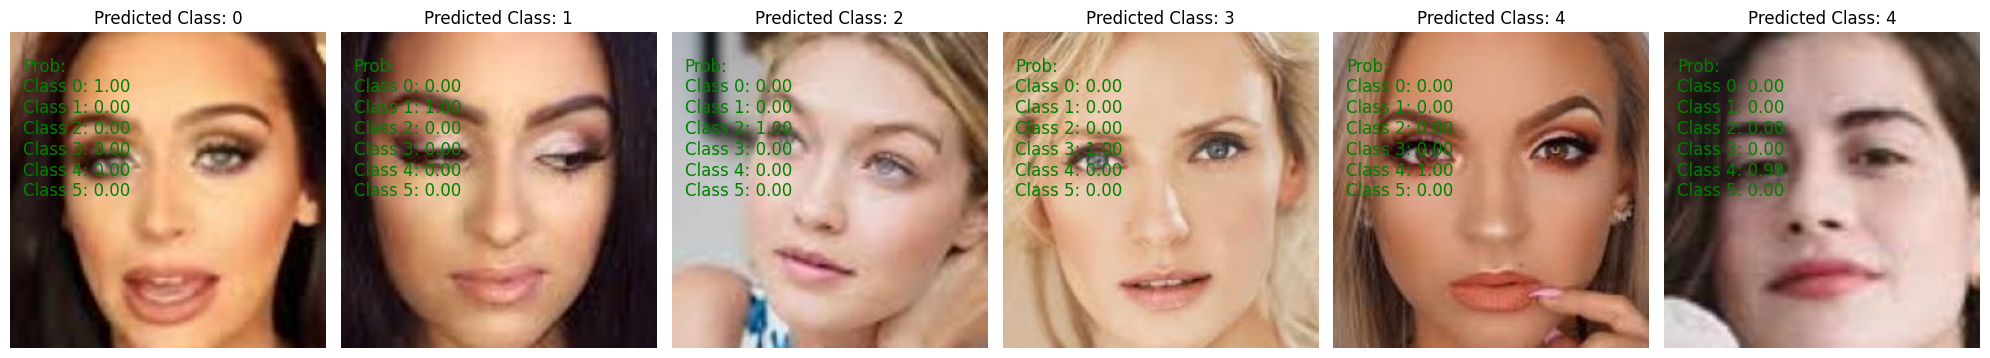

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.models import load_model

# 確保模型已載入
model_path = 'C:/DL_model/best_model.h5'
model = load_model(model_path)

# 確認模型的輸入形狀
input_shape = model.input_shape[1:4]  # 排除批次維度，只取形狀 (height, width, channels)
print(f"Model input shape: {input_shape}")

# 定義預測和繪圖函數
def predict_and_plot(image_path, model, ax):
    # 載入並預處理圖像
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error loading image at {image_path}")
        return
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 將 BGR 轉換為 RGB
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 將 BGR 轉換為 GRAY
    img_resized = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), (input_shape[1], input_shape[0]))  # 調整大小至模型所需的輸入大小
    img_resized = img_resized / 255.0  # 正規化
    img_resized = np.expand_dims(img_resized, axis=0)  # 增加批次維度
    
    # 使用模型進行預測
    prediction = model.predict(img_resized)
    
    class_label = np.argmax(prediction)  # 獲取預測的類別
    prob_distribution = prediction.squeeze()  # 獲取概率分佈
    prob_distribution_str = '\n'.join([f'Class {i}: {prob:.2f}' for i, prob in enumerate(prob_distribution)])
    
    # 繪製圖像和預測標籤
    ax.imshow(img)
    ax.set_title(f'Predicted Class: {class_label}')
    ax.axis('off')
    ax.text(10, 20, f'Prob:\n{prob_distribution_str}', fontsize=12, ha='left', va='top', color='green')

# 圖像路徑列表
image_paths = ['./test_data/0.jpg', './test_data/1.jpg', './test_data/2.jpg',
               './test_data/3.jpg', './test_data/4.jpg','./test_data/5.jpg']

# 為每個圖像創建子圖
fig, axes = plt.subplots(1, 6, figsize=(20, 6))

# 遍歷每個圖像路徑並繪製
for i, image_path in enumerate(image_paths):
    if i < len(axes):
        predict_and_plot(image_path, model, axes[i])

plt.tight_layout()
plt.show()
